In [1]:
import pandas as pd
import seaborn as sea
from tqdm.auto import tqdm
from random import seed
from random import random
import matplotlib.pyplot as plot

In [2]:
from fer2013_augmenter import Filters
from fer2013_augmenter import Fer2013_Augmenter

In [3]:
# size(dataset_in) = 290 MB
dataset_in  = 'fer2013.csv'
# num_filters = 14 (original image counted)
# size(dataset_out) = 14 * 290 MB = 4 GB
dataset_out = 'fer2013_augmented.csv'
df = pd.read_csv(dataset_in)#[:50]

In [4]:
df_size = len(df)
print("Images:", df_size)

Images: 35887


In [5]:
filters = [ f for f in Filters ]
filters_names = [ f.name for f in filters ]
num_of_filters = len(filters)
print(f"Filters {num_of_filters}: {filters_names}")

Filters 14: ['ORIGINAL', 'SOBEL', 'VERTICAL', 'HORIZONTAL', 'CONTRAST_LOW', 'CONTRAST_HIGH', 'CONTRAST_VERY_HIGH', 'FLIP_HORIZONTAL', 'ROT_LEFT_60_DEGREES', 'ROT_LEFT_40_DEGREES', 'ROT_LEFT_20_DEGREES', 'ROT_RIGHT_20_DEGREES', 'ROT_RIGHT_40_DEGREES', 'ROT_RIGHT_60_DEGREES']


In [6]:
augmenter = Fer2013_Augmenter(df, filters)

Text(0, 0.5, 'Count')

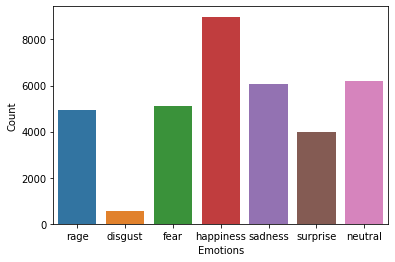

In [7]:
#analysis of dataset
emotions = augmenter.emotions
y = df['emotion']

sx = sea.countplot(x=y)
plot.xticks(range(len(emotions)), emotions);
plot.xlabel("Emotions")
plot.ylabel("Count")

In [12]:
num_of_emotions = df['emotion'].value_counts().sort_index().to_list()
for i in range(len(emotions)) :
    print(emotions[i], "->", num_of_emotions[i])

rage -> 4953
disgust -> 547
fear -> 5121
happiness -> 8989
sadness -> 6077
surprise -> 4002
neutral -> 6198


In [13]:
out_df = augmenter.create_new_df()

converting pixels from string to nparray...


  0%|          | 0/35887 [00:00<?, ?it/s]

generating filters for all images...


  0%|          | 0/35887 [00:00<?, ?it/s]

In [14]:
#print the TRANSPOSE of a random row
seed(None)
img_idx = int(random() * df_size)
print('img_idx:', img_idx)
#random row in dataset:
print(out_df[img_idx:img_idx+1].T)

img_idx: 18333
                                                                  18333
emotion                                                               0
Usage                                                          Training
ORIGINAL              240 240 239 239 240 240 241 240 233 211 202 20...
CONTRAST_LOW          113 169 169 169 169 169 169 168 164 159 155 15...
CONTRAST_HIGH         112 168 168 168 169 169 169 162 148 131 119 11...
CONTRAST_VERY_HIGH    112 168 167 168 168 169 169 159 139 115 100 97...
HORIZONTAL            -717 -956 -956 -957 -959 -960 -959 -935 -877 -...
VERTICAL              -719 2 2 -3 -3 -2 1 39 93 82 30 -3 -2 8 0 -7 -...
SOBEL                 1015 956 956 957 959 960 959 935 881 826 794 7...
FLIP_HORIZONTAL       237 237 237 237 237 236 238 235 209 198 193 19...
ROT_LEFT_60_DEGREES   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 51 169 236 236...
ROT_LEFT_40_DEGREES   0 0 0 0 0 0 0 0 0 0 0 0 88 237 237 237 236 236...
ROT_LEFT_20_DEGREES   0 0 0 0 0 0 0 192 237 237 2

img_idx: 18333
emotion: rage


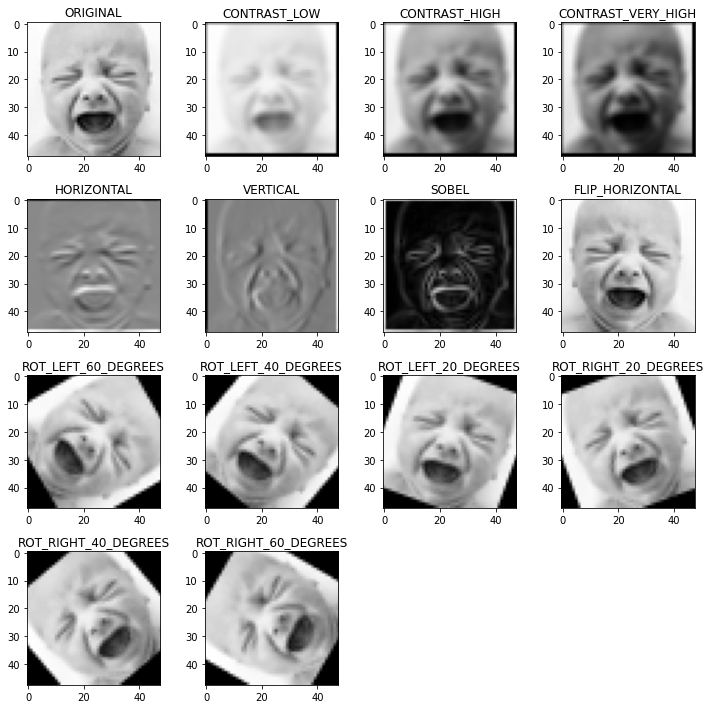

In [15]:
augmenter.print_example(out_df, img_idx=img_idx)

In [16]:
out_df.to_csv(dataset_out, index=False)